In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools
import nltk
from nltk.corpus import stopwords
import re
import collections
import squarify
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
tw = pd.read_csv('twitter.csv')
tw.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,truncated,retweet_count,favorite_count,lang,to_user_name,in_reply_to_status_id,quoted_status_id,source,location,lat,lng,from_user_id,from_user_realname,from_user_verified,from_user_description,from_user_url,from_user_profile_image_url,from_user_utcoffset,from_user_timezone,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,urls,urls_expanded,urls_followed,domains,HTTP status code,mentions,hashtags
0,1225314274983190529,1580972663,2020-02-06 07:04:23,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,NaN,NaN,NaN,1,0,es,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",NaN,NaN,63172126,Agatha RuizdelaPrada,1,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,NaN,NaN,NaN,25535,34221,80,8772,314,NaN,2009-08-05 16:03:15,https://t.co/l4Er2V8mjV; https://t.co/l4Er2V8mjV,http://bit.ly/2Skfm3E; http://bit.ly/2Skfm3E,;,;,;,ParaTiOnline; ParaTiOnline,agatharuizdelaprada; madrid; mfw; agatharuizde...
1,1225314561596809217,1580972731,2020-02-06 07:05:31,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,NaN,NaN,NaN,1,0,es,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",NaN,NaN,63172126,Agatha RuizdelaPrada,1,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,NaN,NaN,NaN,25535,34221,80,8772,314,NaN,2009-08-05 16:03:15,https://t.co/l4Er2V8mjV,http://bit.ly/2Skfm3E,NaN,NaN,NaN,ParaTiOnline,agatharuizdelaprada; madrid; mfw
2,1225317676748169216,1580973474,2020-02-06 07:17:54,dikanind,RT @MensHumor: Fashion Week has truly risen to...,none,NaN,NaN,NaN,NaN,6,0,en,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","Jakarta, INDONESIA",NaN,NaN,26261609,Dika Anindyajati,0,full-time weekender. part-time engineer. loves...,NaN,http://pbs.twimg.com/profile_images/5052449979...,NaN,NaN,NaN,13217,340,270,373,7,NaN,2009-03-24 15:52:37,NaN,NaN,NaN,NaN,NaN,MensHumor,NaN
3,1225317776065208320,1580973497,2020-02-06 07:18:17,skenxxieco,RT @BoF: Fashion month is upon us. But what do...,none,0.0,NaN,NaN,NaN,12,0,en,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",mars,NaN,NaN,466191679,scar-yeet coedashian,0,yozen frogurt,NaN,http://pbs.twimg.com/profile_images/6030360185...,NaN,NaN,NaN,76712,202,546,12892,3,NaN,2012-01-17 04:36:58,https://t.co/apaAQcHN7I,https://bit.ly/2Lotbuh,NaN,NaN,NaN,BoF,NaN
4,1225317911419486210,1580973530,2020-02-06 07:18:50,markieemarxh,RT @miloismybaby: Mark was supposed to attend ...,none,NaN,NaN,NaN,NaN,1920,0,en,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",FarAway Land,NaN,NaN,947526434750324736,삼월❤,0,AHGASE🐦 | MarkJin🐰🍑💖💙 | JYPNATION/GGs | I retw...,NaN,http://pbs.twimg.com/profile_images/1220013140...,NaN,NaN,NaN,72276,94,148,30677,0,NaN,2017-12-31 17:54:41,NaN,NaN,NaN,NaN,NaN,miloismybaby; GOT7Official; jypnation,TreatMarkBetter


In [ ]:
tw.columns

In [ ]:
tw.shape

In [ ]:
tw.isna().sum()

In [3]:
tw.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [ ]:
tw.iloc[:5, 15:20]

In [ ]:
tw.location.nunique()

In [4]:
lang = pd.read_csv('language-codes_csv.csv')
lang.head()

,alpha2,English
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan
3,af,Afrikaans
4,ak,Akan


In [5]:
twe = tw.drop(['urls', 'urls_expanded', 'urls_followed', 'domains', 'HTTP status code'], axis = 1)

In [6]:
twhash = pd.read_csv('twhash.csv')

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
twhash.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [8]:
twittot = pd.concat([twe, twhash])

In [9]:
twlangtot = twittot.merge(lang, left_on = 'lang', right_on = 'alpha2', how = 'outer')
twlangtot.English.value_counts()[:20]

English                    1303791
Thai                         80892
French                       46263
Japanese                     41208
Korean                       36376
Spanish; Castilian           28697
Italian                      20067
Portuguese                   16096
German                        9042
Polish                        7487
Turkish                       3676
Tagalog                       3519
Haitian; Haitian Creole       2523
Estonian                      2075
Danish                        1712
Swedish                       1596
Arabic                        1545
Dutch; Flemish                1507
Catalan; Valencian            1376
Hungarian                     1264
Name: English, dtype: int64

In [10]:
langcounttot = twlangtot.English.value_counts()[:20]

In [11]:
loccounttot = twlangtot.location.value_counts()[:25]

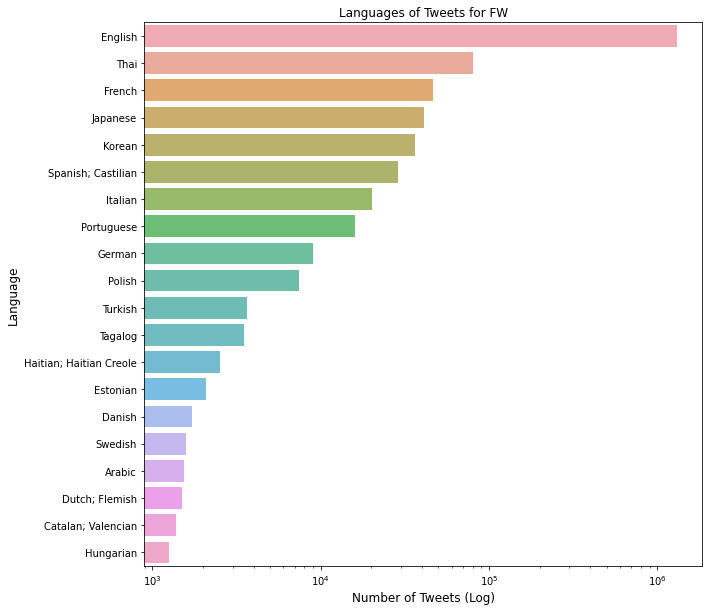

In [12]:
plt.figure(figsize=(10,10))
s = sns.barplot(langcounttot.values, langcounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Languages of Tweets for FW')
plt.ylabel('Language', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("langtot.png")
plt.show()

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/mat

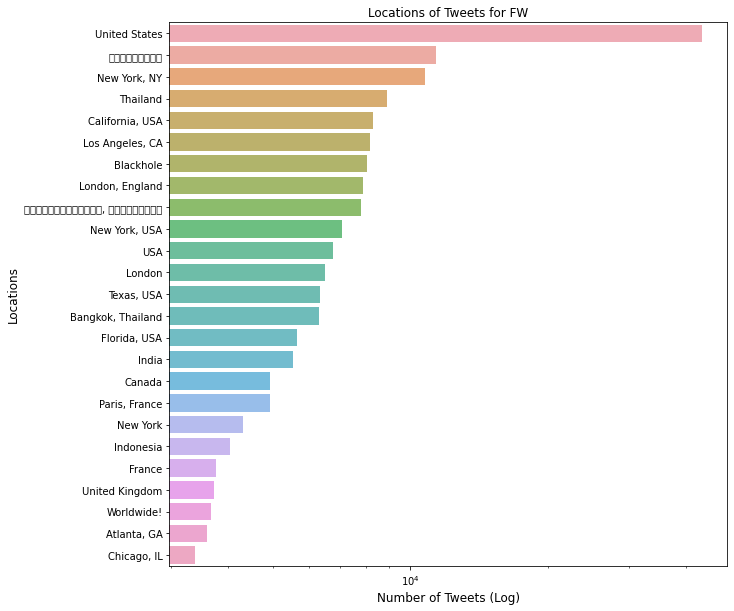

In [13]:
plt.figure(figsize=(10,10))
s = sns.barplot(loccounttot.values, loccounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Locations of Tweets for FW')
plt.ylabel('Locations', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("locationtotal.png")
plt.show()

In [14]:
langcounttot = twlangtot.English.value_counts()[:20]

In [15]:
twlangtot.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,source,location,from_user_id,from_user_realname,from_user_verified,from_user_description,from_user_url,from_user_profile_image_url,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_created_at,mentions,hashtags,alpha2,English
0,1.225314e+18,1.580973e+09,2020-02-06 07:04:23,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1.0,0.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",6.317213e+07,Agatha RuizdelaPrada,1.0,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535.0,34221.0,80.0,8772.0,314.0,2009-08-05 16:03:15,ParaTiOnline; ParaTiOnline,agatharuizdelaprada; madrid; mfw; agatharuizde...,es,Spanish; Castilian
1,1.225315e+18,1.580973e+09,2020-02-06 07:05:31,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1.0,0.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",6.317213e+07,Agatha RuizdelaPrada,1.0,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535.0,34221.0,80.0,8772.0,314.0,2009-08-05 16:03:15,ParaTiOnline,agatharuizdelaprada; madrid; mfw,es,Spanish; Castilian
2,1.225324e+18,1.580975e+09,2020-02-06 07:43:53,nurialamuniz,Nos os perdáis hasta el día 9 la #SFWMadrid en...,none,0.0,4.0,2.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Comunidad de Madrid",9.441865e+08,Delaene,0.0,Mi marca DELAENE. Fundadora de DEL MAR Y PARA ...,https://t.co/JVWBDeY16F,http://pbs.twimg.com/profile_images/2841281615...,894.0,300.0,277.0,1615.0,9.0,2012-11-12 17:52:08,talentgardenes; AltrapoLAB,SFWMadrid; alcorcon; queenupcycling,es,Spanish; Castilian
3,1.225327e+18,1.580976e+09,2020-02-06 07:54:35,romenauer,RT @nurialamuniz: Nos os perdáis hasta el día ...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...","Madrid, Comunidad de Madrid",1.722131e+07,Francisco Romero,0.0,Socio de @coocreando y @logica_eco. Ahora cola...,https://t.co/OPuu07qgYH,http://pbs.twimg.com/profile_images/1220337413...,21199.0,1655.0,794.0,16238.0,126.0,2008-11-06 22:41:16,nurialamuniz; talentgardenes; AltrapoLAB,SFWMadrid; alcorcon; queenupcycling,es,Spanish; Castilian
4,1.225332e+18,1.580977e+09,2020-02-06 08:14:05,CircularProject,RT @PEFCSpain: ¡De esto disfrutaremos en la Su...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...",Ventura Rodríguez 22 - Madrid,2.839616e+09,The Circular Project,0.0,Desarrollo holístico de #modasostenible #slowf...,https://t.co/KeKlvfZcE0,http://pbs.twimg.com/profile_images/5376285979...,12308.0,5134.0,3095.0,14333.0,236.0,2014-10-21 10:24:27,PEFCSpain; AnaBNoriega; MadridSfw; CircularPro...,PEFC; forestsforfashion; foreststay,es,Spanish; Castilian


In [16]:
twlangtot['created_at'] = pd.to_datetime(twlangtot['created_at'])

twlangtot['day'] = twlangtot['created_at'].dt.day

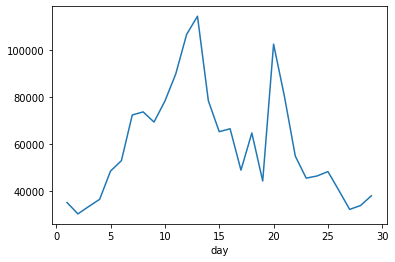

In [17]:
twlangtot.groupby(['day'])['id'].count().plot()

In [18]:
thai = twlangtot[twlangtot['English'] == 'Thai']
french = twlangtot[twlangtot['English'] == 'French']
japanese = twlangtot[twlangtot['English'] == 'Japanese']
korean = twlangtot[twlangtot['English'] == 'Korean']
spanish = twlangtot[twlangtot['English'] == 'Spanish; Castilian']
italian = twlangtot[twlangtot['English'] == 'Italian']
port = twlangtot[twlangtot['English'] == 'Portuguese']
tag = twlangtot[twlangtot['English'] == 'Tagalog']
english = twlangtot[twlangtot['English'] == 'English']

In [ ]:
thai.head()

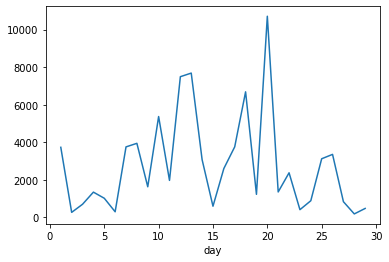

In [19]:
thai.groupby(['day'])['id'].count().plot()

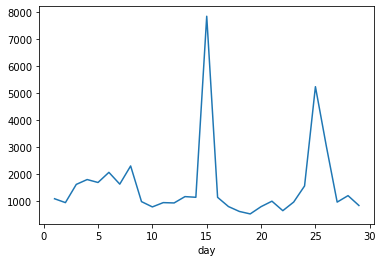

In [20]:
french.groupby(['day'])['id'].count().plot()

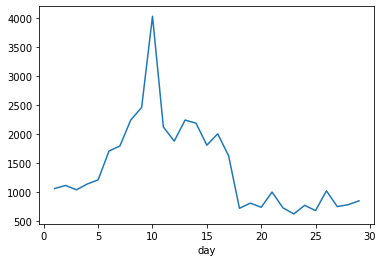

In [21]:
japanese.groupby(['day'])['id'].count().plot()

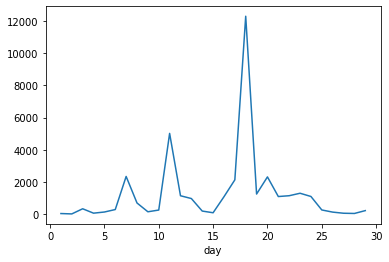

In [22]:
korean.groupby(['day'])['id'].count().plot()

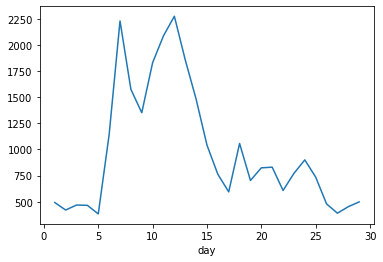

In [23]:
spanish.groupby(['day'])['id'].count().plot()

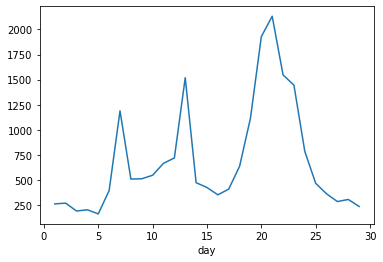

In [24]:
italian.groupby(['day'])['id'].count().plot()

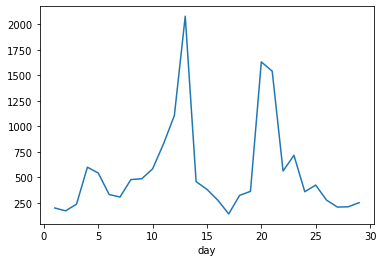

In [25]:
port.groupby(['day'])['id'].count().plot()

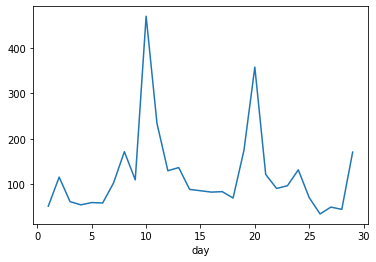

In [26]:
tag.groupby(['day'])['id'].count().plot()

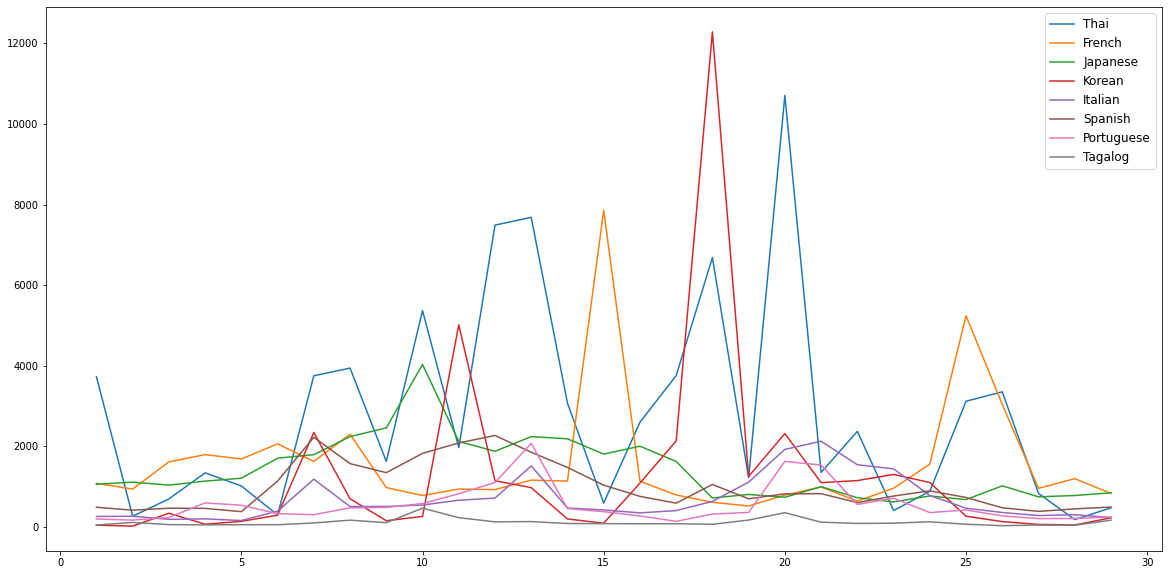

In [27]:
plt.figure(figsize = [20,10])
plt.plot(thai.groupby(['day'])['id'].count())
plt.plot(french.groupby(['day'])['id'].count())
plt.plot(japanese.groupby(['day'])['id'].count())
plt.plot(korean.groupby(['day'])['id'].count())
plt.plot(italian.groupby(['day'])['id'].count())
plt.plot(spanish.groupby(['day'])['id'].count())
plt.plot(port.groupby(['day'])['id'].count())
plt.plot(tag.groupby(['day'])['id'].count())
plt.legend(['Thai', 'French', 'Japanese', 'Korean', 'Italian', 'Spanish', 'Portuguese', 'Tagalog'], fontsize = 'large')

Text(0.5, 1.0, 'English')

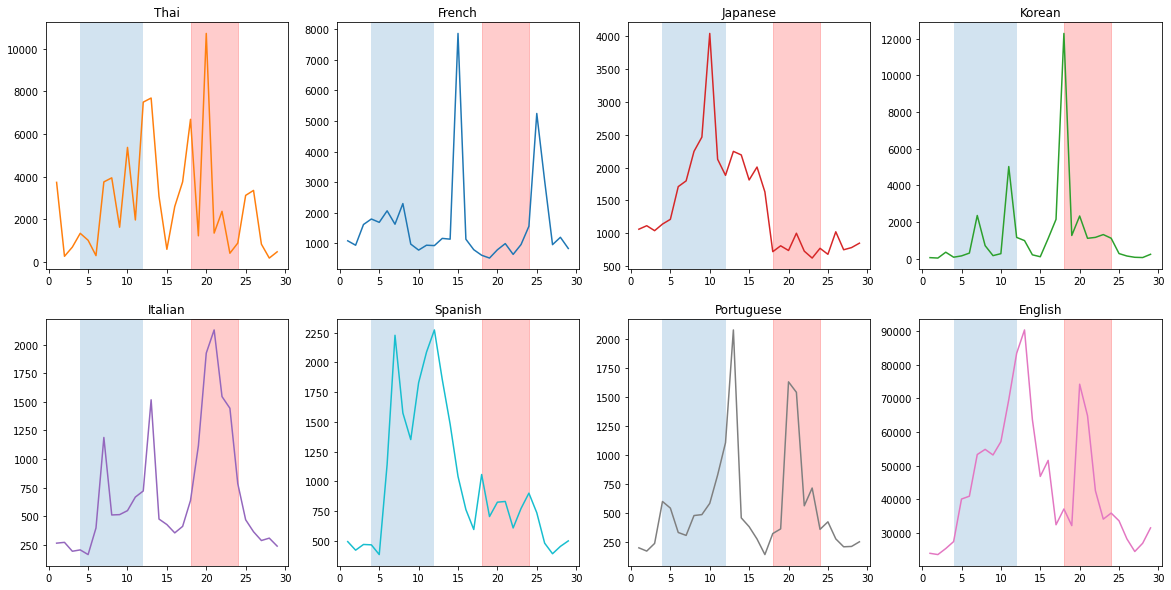

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs[0, 0].plot(thai.groupby(['day'])['id'].count(), 'tab:orange')
axs[0, 0].axvspan(4, 12, alpha = 0.2)
axs[0, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
#axs[0, 0].axvline(x = 12, linestyle = '--')
#axs[0, 0].axvline(x = 18, linestyle = '--', c = 'r')
#axs[0, 0].axvline(x = 24, linestyle = '--', c = 'r')
axs[0, 0].set_title('Thai')

axs[0, 1].plot(french.groupby(['day'])['id'].count(), 'tab:blue')
axs[0, 1].axvspan(4, 12, alpha = 0.2)
axs[0, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 1].set_title('French')

axs[0, 2].plot(japanese.groupby(['day'])['id'].count(), 'tab:red')
axs[0, 2].axvspan(4, 12, alpha = 0.2)
axs[0, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 2].set_title('Japanese')

axs[0, 3].plot(korean.groupby(['day'])['id'].count(), 'tab:green')
axs[0, 3].axvspan(4, 12, alpha = 0.2)
axs[0, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 3].set_title('Korean')

axs[1, 0].plot(italian.groupby(['day'])['id'].count(), 'tab:purple')
axs[1, 0].axvspan(4, 12, alpha = 0.2)
axs[1, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 0].set_title('Italian')

axs[1, 1].plot(spanish.groupby(['day'])['id'].count(), 'tab:cyan')
axs[1, 1].axvspan(4, 12, alpha = 0.2)
axs[1, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 1].set_title('Spanish')

axs[1, 2].plot(port.groupby(['day'])['id'].count(), 'tab:gray')
axs[1, 2].axvspan(4, 12, alpha = 0.2)
axs[1, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 2].set_title('Portuguese')

axs[1, 3].plot(english.groupby(['day'])['id'].count(), 'tab:pink')
axs[1, 3].axvspan(4, 12, alpha = 0.2)
axs[1, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 3].set_title('English')

I think this might be useful in terms of community too, just seeing if around a specific brand there’s been interaction in some particular language, and if this is a community, and why

### Get brand from brandlists (NYFW, MFW), convert to lower and remove spaces, convert hashtags and metions to lower too

In [29]:
mibrands = pd.read_csv('MIFW.csv', delimiter = ';')

In [30]:
nybrands = pd.read_csv('NYFW.csv', delimiter = ';')

In [41]:
mibrands.head()

,BRAND,DAY,HOUR,LOCATION,INSTAGRAM,NOTE,TWITTER
0,GILBERTO CALZOLARI,19-feb,09:30,VIA DELLA LIBERAZIONE ANG. VIA MELCHIORRE GIOIA,gilbertocalzolari_official,NaN,GilCalzolari
1,MARCO RAMBALDI,19-feb,10:30,"VIA TURATI, 34",marcorambaldi_,NaN,NaN
2,CALCATERRA,19-feb,11:30,"VIA SAN GREGORIO, 29",calcaterrad,NaN,NaN
3,ULTRÀCHIC,19-feb,12:30,PIAZZA DUOMO - SCALONE ARENGARIO,ultrachic_official,NaN,ultrachicmilano
4,ARTHUR ARBESSER,19-feb,14:00,"VIA GAUDENZIO FANTOLI, 15/1I",arthurarbesser,fuori dalla circonvallazione,NaN


In [38]:
nybrands.head()

,Brand,Day,Hour,Location,Instagram,Twitter
0,MONSE,07-feb,6:00 PM,30 Wall Street,monsemaison,NaN
1,TOM FORD,07-feb,NaN,Los Angeles,tomford,TOMFORD
2,RAG & BONE,07-feb,7:00 PM,Skylight Vesey,ragandbone,rag_bone
3,PRISCAVERA,07-feb,9:00 PM,NaN,priscavera,NaN
4,BRANDON MAXWELL,08-feb,8:00 PM,American Museum of Natural History,brandonmaxwell,Brandonmaxwell


In [31]:
nybrands.drop(['Num'], axis = 1, inplace = True)

In [32]:
mibrands.drop(['NOTE'], axis = 1, inplace = True)

In [33]:
mibrands = mibrands.rename(columns = {'BRAND':'Brand', 'DAY':'Day', 'HOUR':'Hour', 'LOCATION':'Location', 'INSTAGRAM':'Instagram', 'TWITTER':'Twitter'})

In [34]:
mibrands.head()

,Brand,Day,Hour,Location,Instagram,Twitter
0,GILBERTO CALZOLARI,19-feb,09:30,VIA DELLA LIBERAZIONE ANG. VIA MELCHIORRE GIOIA,gilbertocalzolari_official,GilCalzolari
1,MARCO RAMBALDI,19-feb,10:30,"VIA TURATI, 34",marcorambaldi_,NaN
2,CALCATERRA,19-feb,11:30,"VIA SAN GREGORIO, 29",calcaterrad,NaN
3,ULTRÀCHIC,19-feb,12:30,PIAZZA DUOMO - SCALONE ARENGARIO,ultrachic_official,ultrachicmilano
4,ARTHUR ARBESSER,19-feb,14:00,"VIA GAUDENZIO FANTOLI, 15/1I",arthurarbesser,NaN


In [35]:
brands = pd.concat([nybrands, mibrands])

In [46]:
brands.head()

,Brand,Day,Hour,Location,Instagram,Twitter
0,MONSE,07-feb,6:00 PM,30 Wall Street,monsemaison,NaN
1,TOM FORD,07-feb,NaN,Los Angeles,tomford,TOMFORD
2,RAG & BONE,07-feb,7:00 PM,Skylight Vesey,ragandbone,rag_bone
3,PRISCAVERA,07-feb,9:00 PM,NaN,priscavera,NaN
4,BRANDON MAXWELL,08-feb,8:00 PM,American Museum of Natural History,brandonmaxwell,Brandonmaxwell


In [47]:
brands.isna().sum()

Brand        104
Day          104
Hour         105
Location     149
Instagram    104
Twitter      139
dtype: int64

In [36]:
brands.dropna(subset = ["Brand"], inplace=True)

In [56]:
brands.iloc[70:85, :]

,Brand,Day,Hour,Location,Instagram,Twitter
0,GILBERTO CALZOLARI,19-feb,09:30,VIA DELLA LIBERAZIONE ANG. VIA MELCHIORRE GIOIA,gilbertocalzolari_official,GilCalzolari
1,MARCO RAMBALDI,19-feb,10:30,"VIA TURATI, 34",marcorambaldi_,NaN
2,CALCATERRA,19-feb,11:30,"VIA SAN GREGORIO, 29",calcaterrad,NaN
3,ULTRÀCHIC,19-feb,12:30,PIAZZA DUOMO - SCALONE ARENGARIO,ultrachic_official,ultrachicmilano
4,ARTHUR ARBESSER,19-feb,14:00,"VIA GAUDENZIO FANTOLI, 15/1I",arthurarbesser,NaN
5,GUCCI,19-feb,15:00,"VIA MECENATE, 77",gucci,gucci
6,ALBERTA FERRETTI,19-feb,16:00,VIA MECENATE 88/A,albertaferretti,albertaferretti
7,N°21,19-feb,17:00,"VIA ARCHIMEDE, 26",numeroventuno,NUMEROVENTUNO
8,JIL SANDER,19-feb,18:00,"VIA BRAMANTE,42",jilsander,jilsanderPR
9,MONCLER,19-feb,19:00,"VIALE MOLISE,70",moncler,moncler


In [37]:
brandsset = set(brands['Brand'])

In [86]:
brandsset

{' VERONICA BEARD ',
 'ACT N°1',
 'ADAM LIPPES ',
 'AGNONA',
 'ALBERTA FERRETTI',
 'ALEJANDRA ALONSO ROJAS ',
 'ALEXANDRA MOURA',
 'ALICE + OLIVIA',
 'ALIETTE',
 'ANNA SUI',
 'ANNAKIKI',
 'ANTEPRIMA',
 'ANTONIO MARRAS',
 'AREA',
 'ARTHUR ARBESSER',
 'ATSUSHI NAKASHIMA',
 'BADGLEY MISCHKA',
 'BIBHU MOHAPATRA ',
 'BOSS',
 'BOTTEGA VENETA',
 'BRANDON MAXWELL ',
 'BROCK COLLECTION ',
 'BROGNANO',
 'CALCATERRA',
 'CAROLINA HERRERA ',
 'CHRISTIAN COWAN ',
 'CHRISTOPHER JOHN ROGERS ',
 'CHROMAT',
 'CIVIDINI',
 'CLAUDIA LI ',
 'COACH 1941',
 'COLLINA STRADA  ',
 'CRISTIANO BURANI',
 'CYNTHIA ROWLEY ',
 'DANIELA GREGIS',
 'DENNIS BASSO',
 'DION LEE',
 'DROME',
 'ECKHAUS LATTA ',
 'EMPORIO ARMANI',
 'ERMANNO SCERVINO',
 'ETRO',
 'FE NOEL ',
 'FENDI',
 'FILA',
 'FRANKIE MORELLO MILANO',
 'GABRIELA HEARST ',
 'GABRIELE COLANGELO',
 'GCDS',
 'GENNY',
 'GILBERTO CALZOLARI',
 'GIORGIO ARMANI',
 'GRAHAM TYLER ',
 'GUCCI',
 'HELLESSY',
 'HELMUT LANG',
 'ICEBERG',
 'JASON WU COLLECTION ',
 'JEFFREY DODD

In [38]:
twbrands = brands.Twitter

In [39]:
twbrands.dropna(inplace = True)

In [90]:
twbrands.head()

1           TOMFORD
2          rag_bone
4    Brandonmaxwell
5    BadgleyMischka
9        snowxuegao
Name: Twitter, dtype: object

In [40]:
twbrandsset = set(twbrands)

In [92]:
twbrandsset

{'ANNAKIKIWORLD',
 'ANTEPRIMA_WORLD',
 'AdamLippes',
 'AnitaCividini',
 'BROCKCOLLECTION',
 'BadgleyMischka',
 'BibhuMohapatra',
 'BottegaVeneta',
 'Brandonmaxwell',
 'CHROMAT_PARTY',
 'Coach',
 'Cynthia_Rowley',
 'DennisBasso',
 'ECKHAUS_LATTA',
 'EtroOfficial',
 'FILAUSA                       fila_korea',
 'Fendi',
 'Ferragamo',
 'GCDSwear',
 'GilCalzolari',
 'HELMUTLANG',
 'HUGOBOSS',
 'HouseofHerrera',
 'JasonWu',
 'JonathanSimkhai',
 'LaQuanSmith',
 'Lbofficialpage',
 'Lela_Rose',
 'Longchamp',
 'MarchesaFashion',
 'MichaelKors',
 'Missoni',
 'Moschino',
 'NAEEMKHANNYC',
 'NUMEROVENTUNO',
 'OfficialRodarte',
 'OscardelaRenta',
 'Prada',
 'R13Denim',
 'ROMEOHUNTE',
 'RebeccaMinkoff',
 'SiesMarjan',
 'THEROW',
 'TOMFORD',
 'Theory__',
 'VeraWang',
 'Versace',
 'VivettaVivetta',
 'ZIMMERMANN_',
 '_selfportrait_',
 'agnonaofficial',
 'albertaferretti',
 'alexandramoura',
 'aliceandolivia',
 'annasui',
 'area_nyc_',
 'armani',
 'atsu_nakashima',
 'christiancowan',
 'emporioarmani',
 'e

In [41]:
brands_lw = [brand.lower() for brand in twbrands]

In [42]:
brandset = set(brands_lw)

In [82]:
brandset

{'_selfportrait_',
 'adamlippes',
 'agnonaofficial',
 'albertaferretti',
 'alexandramoura',
 'aliceandolivia',
 'anitacividini',
 'annakikiworld',
 'annasui',
 'anteprima_world',
 'area_nyc_',
 'armani',
 'atsu_nakashima',
 'badgleymischka',
 'bibhumohapatra',
 'bottegaveneta',
 'brandonmaxwell',
 'brockcollection',
 'christiancowan',
 'chromat_party',
 'coach',
 'cynthia_rowley',
 'dennisbasso',
 'eckhaus_latta',
 'emporioarmani',
 'ermannoscervino',
 'etroofficial',
 'fendi',
 'fenoelofficial',
 'ferragamo',
 'filausa                       fila_korea',
 'frankiemorello',
 'gabrielahearst',
 'gcdswear',
 'gilcalzolari',
 'gucci',
 'hellessyny',
 'helmutlang',
 'houseofherrera',
 'hugoboss',
 'jasonwu',
 'jilsanderpr',
 'jonathancohenstudio',
 'jonathansimkhai',
 'katespadeny',
 'khaite_ny',
 'kimshuistudio',
 'laquansmith',
 'lbofficialpage',
 'lela_rose',
 'longchamp',
 'luisabeccaria',
 'marchesafashion',
 'marcjacobs',
 'marniofficial',
 'maxmara',
 'michaelkors',
 'missoni',
 'mon

What can we do - plot

In [96]:
twlangtot.head(10)

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,source,location,from_user_id,from_user_realname,from_user_verified,from_user_description,from_user_url,from_user_profile_image_url,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_created_at,mentions,hashtags,alpha2,English,day
0,1.225314e+18,1.580973e+09,2020-02-06 07:04:23,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1.0,0.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",6.317213e+07,Agatha RuizdelaPrada,1.0,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535.0,34221.0,80.0,8772.0,314.0,2009-08-05 16:03:15,ParaTiOnline; ParaTiOnline,agatharuizdelaprada; madrid; mfw; agatharuizde...,es,Spanish; Castilian,6.0
1,1.225315e+18,1.580973e+09,2020-02-06 07:05:31,agathardlp,RT @ParaTiOnline: La diseñadora Agatha Ruiz de...,none,NaN,1.0,0.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Milano, París, Bogotá",6.317213e+07,Agatha RuizdelaPrada,1.0,Design&Arts,http://t.co/9xR7uoS4Fg,http://pbs.twimg.com/profile_images/725322687/...,25535.0,34221.0,80.0,8772.0,314.0,2009-08-05 16:03:15,ParaTiOnline,agatharuizdelaprada; madrid; mfw,es,Spanish; Castilian,6.0
2,1.225324e+18,1.580975e+09,2020-02-06 07:43:53,nurialamuniz,Nos os perdáis hasta el día 9 la #SFWMadrid en...,none,0.0,4.0,2.0,es,"<a href=""http://twitter.com/download/iphone"" r...","Madrid, Comunidad de Madrid",9.441865e+08,Delaene,0.0,Mi marca DELAENE. Fundadora de DEL MAR Y PARA ...,https://t.co/JVWBDeY16F,http://pbs.twimg.com/profile_images/2841281615...,894.0,300.0,277.0,1615.0,9.0,2012-11-12 17:52:08,talentgardenes; AltrapoLAB,SFWMadrid; alcorcon; queenupcycling,es,Spanish; Castilian,6.0
3,1.225327e+18,1.580976e+09,2020-02-06 07:54:35,romenauer,RT @nurialamuniz: Nos os perdáis hasta el día ...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...","Madrid, Comunidad de Madrid",1.722131e+07,Francisco Romero,0.0,Socio de @coocreando y @logica_eco. Ahora cola...,https://t.co/OPuu07qgYH,http://pbs.twimg.com/profile_images/1220337413...,21199.0,1655.0,794.0,16238.0,126.0,2008-11-06 22:41:16,nurialamuniz; talentgardenes; AltrapoLAB,SFWMadrid; alcorcon; queenupcycling,es,Spanish; Castilian,6.0
4,1.225332e+18,1.580977e+09,2020-02-06 08:14:05,CircularProject,RT @PEFCSpain: ¡De esto disfrutaremos en la Su...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...",Ventura Rodríguez 22 - Madrid,2.839616e+09,The Circular Project,0.0,Desarrollo holístico de #modasostenible #slowf...,https://t.co/KeKlvfZcE0,http://pbs.twimg.com/profile_images/5376285979...,12308.0,5134.0,3095.0,14333.0,236.0,2014-10-21 10:24:27,PEFCSpain; AnaBNoriega; MadridSfw; CircularPro...,PEFC; forestsforfashion; foreststay,es,Spanish; Castilian,6.0
5,1.225332e+18,1.580977e+09,2020-02-06 08:14:36,CircularProject,RT @MadridSfw: #SFWMadrid es más q una pasarel...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...",Ventura Rodríguez 22 - Madrid,2.839616e+09,The Circular Project,0.0,Desarrollo holístico de #modasostenible #slowf...,https://t.co/KeKlvfZcE0,http://pbs.twimg.com/profile_images/5376285979...,12308.0,5134.0,3095.0,14333.0,236.0,2014-10-21 10:24:27,MadridSfw; pinkermoda,SFWMadrid; modasostenible; ODS17; ODS,es,Spanish; Castilian,6.0
6,1.225332e+18,1.580977e+09,2020-02-06 08:15:04,AsocMSMAD,RT @MadridSfw: #SFWMadrid es más q una pasarel...,none,NaN,4.0,0.0,es,"<a href=""http://twitter.com/download/android"" ...","Madrid, España",4.104866e+09,MSMAD,0.0,Asociación de Moda Sostenible de #Madrid para ...,https://t.co/YhQmy2UZEi,http://pbs.twimg.com/profile_images/6615381587...,3323.0,1689.0,855.0,5119.0,56.0,2015-11-03 13:28:28,MadridSfw; pinkermoda,SFWMadrid; modasostenible; ODS17; ODS,es,Spanish; Castilian,6.0
7,1.225332e+18,1.580977e+09,2020-02-06 08:15:11,Aso

In [43]:
twlangtot['ment'] = twlangtot['mentions'].str.split(';')

In [44]:
brandslang = twlangtot[['English', 'ment']]

In [99]:
brandslang.head()

,English,ment
0,Spanish; Castilian,"[ParaTiOnline, ParaTiOnline]"
1,Spanish; Castilian,[ParaTiOnline]
2,Spanish; Castilian,"[talentgardenes, AltrapoLAB]"
3,Spanish; Castilian,"[nurialamuniz, talentgardenes, AltrapoLAB]"
4,Spanish; Castilian,"[PEFCSpain, AnaBNoriega, MadridSfw, Circula..."


In [45]:
bl = brandslang[(brandslang['English'] == 'Thai')|(brandslang['English'] == 'Japanese')|(brandslang['English'] == 'Korean')
               |(brandslang['English'] == 'French')|(brandslang['English'] == 'Italian')|(brandslang['English'] == 'Portuguese')
               |(brandslang['English'] == 'English')|(brandslang['English'] == 'Spanish; Castilian')]

In [46]:
text = twlangtot.text

In [47]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [48]:
all_tweets = [remove_url(tweet) for tweet in text]


AttributeError: 'list' object has no attribute 'head'

In [56]:
all_tweets1 = [remove_url(tweet) for tweet in twlangtot.text]
all_tweets1.head()

AttributeError: 'list' object has no attribute 'head'

In [49]:
all_tweets[:5]

['RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 7',
 'RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 1',
 'Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT nurialamuniz Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT PEFCSpain De esto disfrutaremos en la Sustainable Fashion Week 

In [50]:
words = [tweet.lower().split() for tweet in all_tweets]
words[:2]

[['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '7'],
 ['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '1']]

In [51]:
# List of all words across tweets
all_words = list(itertools.chain(*words))

# Create counter
word_counts = collections.Counter(all_words)

word_counts.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('the', 785921),
 ('to', 602379),
 ('style', 532704),
 ('week', 502932),
 ('on', 444874),
 ('i', 393176),
 ('out', 357199),
 ('all', 347459),
 ('so', 342465),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583)]

In [52]:
clean_tweets = pd.DataFrame(word_counts.most_common(500),
                             columns=['words', 'count'])

clean_tweets.head()

,words,count
0,fashion,1354484
1,rt,991740
2,the,785921
3,to,602379
4,style,532704


In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnhughes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['are',
 'again',
 'just',
 'an',
 'won',
 'during',
 'my',
 'herself',
 'yours',
 "mustn't"]

In [55]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words]

tweets_nsw[0]

['rt',
 'parationline',
 'la',
 'diseadora',
 'agatha',
 'ruiz',
 'de',
 'la',
 'prada',
 'present',
 'una',
 'coleccin',
 'moderna',
 'llena',
 'de',
 'color',
 'en',
 'el',
 'fashion',
 'week',
 'de',
 'madrid',
 'te',
 'la',
 'mostramos',
 'en',
 'esta',
 'nota',
 'agatharuizdelaprada',
 'madrid',
 'mfw',
 '7']

In [56]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('style', 532704),
 ('week', 502932),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583),
 ('items', 317714),
 ('poshmark', 316561),
 ('loving', 316025),
 ('shopmycloset', 315306),
 ('poshmarkapp', 314818),
 ('nyfw', 204550),
 ('show', 182227)]

In [57]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(10000),
                             columns=['words', 'count'])

In [58]:
clean_tweets_nsw.iloc[15:35, :]

,words,count
15,2020,166793
16,lisa,154413
17,new,146788
18,milan,144626
19,mfw,136041
20,york,98500
21,paris,94557
22,blackpink,88120
23,love,83906
24,prada,83076


In [59]:
cln = clean_tweets_nsw[clean_tweets_nsw['words'].isin(brandset)]

In [60]:
cln.shape

(41, 2)

In [61]:
thai_tweets = [remove_url(tweet) for tweet in thai.text]

thaiwords = [tweet.lower().split() for tweet in thai_tweets]

# List of all words across tweets
thai_words = list(itertools.chain(*thaiwords))

thai_counts = collections.Counter(thai_words)

thai_tweets = pd.DataFrame(thai_counts.most_common(10000),
                             columns=['words', 'count'])

clean_thai = thai_tweets[thai_tweets['words'].isin(brandset)]

clean_thai.shape

(14, 2)

In [62]:
english_tweets = [remove_url(tweet) for tweet in english.text]

englishwords = [tweet.lower().split() for tweet in english_tweets]

# List of all words across tweets
english_words = list(itertools.chain(*englishwords))

# Create counter
english_counts = collections.Counter(english_words)

english_tweets = pd.DataFrame(english_counts.most_common(10000),
                             columns=['words', 'count'])

clean_english = english_tweets[english_tweets['words'].isin(brandset)]

clean_english.shape

(44, 2)

In [63]:
french_tweets = [remove_url(tweet) for tweet in french.text]

frenchwords = [tweet.lower().split() for tweet in french_tweets]

# List of all words across tweets
french_words = list(itertools.chain(*frenchwords))

french_counts = collections.Counter(french_words)

french_tweets = pd.DataFrame(french_counts.most_common(10000),
                             columns=['words', 'count'])

clean_french = french_tweets[french_tweets['words'].isin(brandset)]

clean_french.shape

(19, 2)

In [64]:
italian_tweets = [remove_url(tweet) for tweet in italian.text]

italianwords = [tweet.lower().split() for tweet in italian_tweets]

# List of all words across tweets
italian_words = list(itertools.chain(*italianwords))

italian_counts = collections.Counter(italian_words)

italian_tweets = pd.DataFrame(italian_counts.most_common(10000),
                             columns=['words', 'count'])

clean_italian = italian_tweets[italian_tweets['words'].isin(brandset)]

clean_italian.shape

(37, 2)

In [65]:
japanese_tweets = [remove_url(tweet) for tweet in japanese.text]

japanesewords = [tweet.lower().split() for tweet in japanese_tweets]

# List of all words across tweets
japanese_words = list(itertools.chain(*japanesewords))

japanese_counts = collections.Counter(japanese_words)

japanese_tweets = pd.DataFrame(japanese_counts.most_common(10000),
                             columns=['words', 'count'])

clean_japanese = japanese_tweets[japanese_tweets['words'].isin(brandset)]

clean_japanese.shape

(22, 2)

In [66]:
korean_tweets = [remove_url(tweet) for tweet in korean.text]

koreanwords = [tweet.lower().split() for tweet in korean_tweets]

# List of all words across tweets
korean_words = list(itertools.chain(*koreanwords))

korean_counts = collections.Counter(korean_words)

korean_tweets = pd.DataFrame(korean_counts.most_common(10000),
                             columns=['words', 'count'])

clean_korean = korean_tweets[korean_tweets['words'].isin(brandset)]

clean_korean.shape

(9, 2)

In [67]:
spanish_tweets = [remove_url(tweet) for tweet in spanish.text]

spanishwords = [tweet.lower().split() for tweet in spanish_tweets]

# List of all words across tweets
spanish_words = list(itertools.chain(*spanishwords))

spanish_counts = collections.Counter(spanish_words)

spanish_tweets = pd.DataFrame(spanish_counts.most_common(10000),
                             columns=['words', 'count'])

clean_spanish = spanish_tweets[spanish_tweets['words'].isin(brandset)]

clean_spanish.shape

(30, 2)

In [68]:
port_tweets = [remove_url(tweet) for tweet in port.text]

portwords = [tweet.lower().split() for tweet in port_tweets]

# List of all words across tweets
port_words = list(itertools.chain(*portwords))

port_counts = collections.Counter(port_words)

port_tweets = pd.DataFrame(port_counts.most_common(10000),
                             columns=['words', 'count'])

clean_port = port_tweets[port_tweets['words'].isin(brandset)]

clean_port.shape

(21, 2)

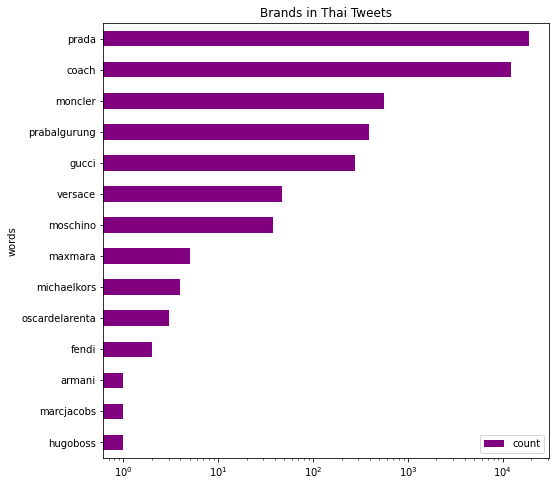

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_thai.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Thai Tweets")
ax.set_xscale('log')

plt.show()

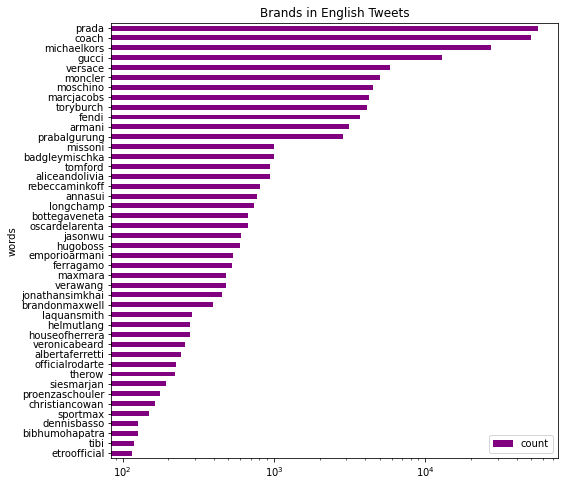

In [70]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_english.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in English Tweets")
ax.set_xscale('log')

plt.show()

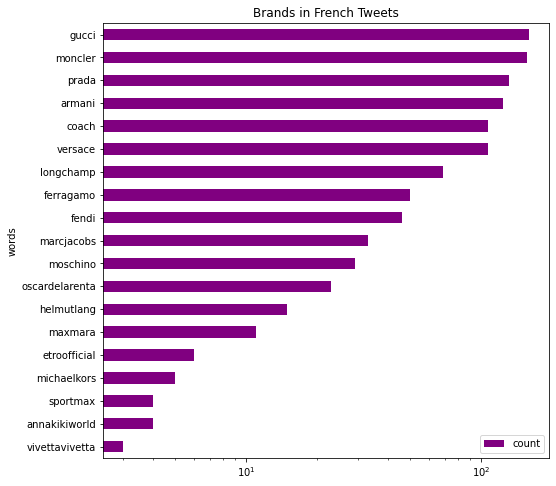

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_french.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in French Tweets")
ax.set_xscale('log')

plt.show()

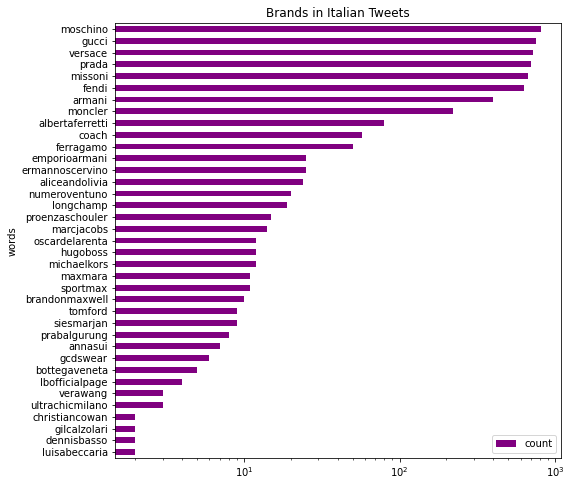

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_italian.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Italian Tweets")
ax.set_xscale('log')

plt.show()

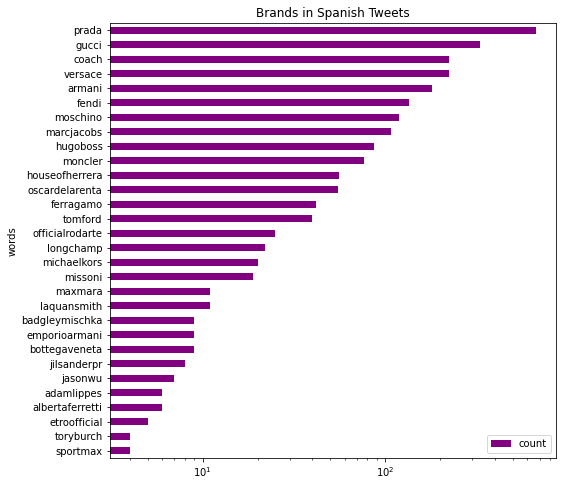

In [73]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_spanish.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Spanish Tweets")
ax.set_xscale('log')

plt.show()

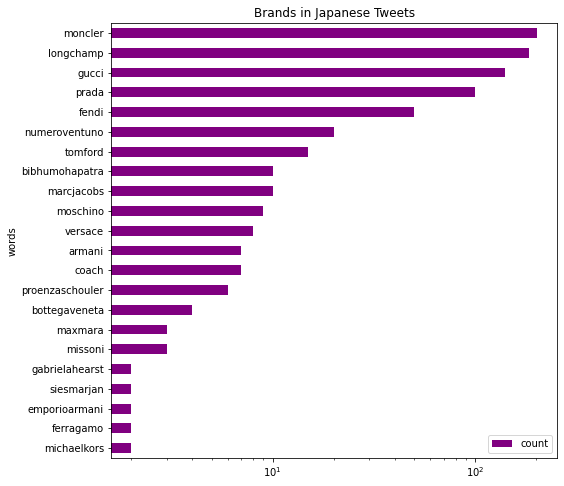

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_japanese.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Japanese Tweets")
ax.set_xscale('log')

plt.show()

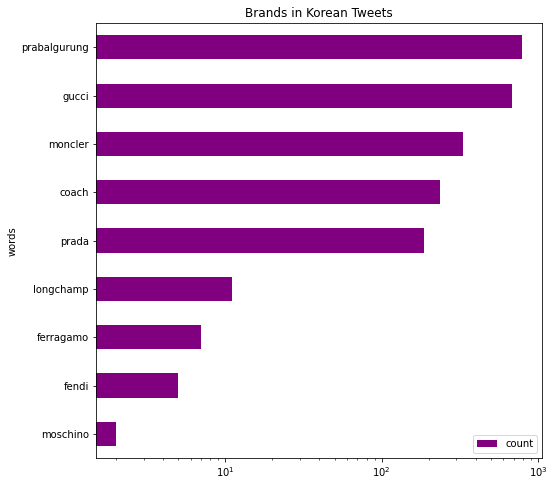

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_korean.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Korean Tweets")
ax.set_xscale('log')

plt.show()

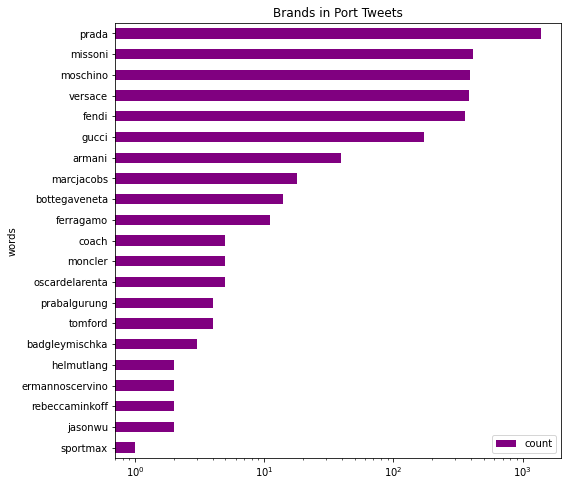

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_port.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Port Tweets")
ax.set_xscale('log')

plt.show()

In [86]:
clean_thai.head()

,words,count,lcount
9,prada,18931,9.848556
13,coach,12146,9.404755
190,moncler,555,6.318968
223,prabalgurung,386,5.955837
261,gucci,276,5.620401


In [84]:
clean_thai.dtypes

words    object
count     int64
dtype: object

In [87]:
clean_thai['lcount'] = np.log(clean_thai['count'])
clean_french['lcount'] = np.log(clean_french['count'])
clean_italian['lcount'] = np.log(clean_italian['count'])
clean_english['lcount'] = np.log(clean_english['count'])
clean_spanish['lcount'] = np.log(clean_spanish['count'])
clean_japanese['lcount'] = np.log(clean_japanese['count'])
clean_korean['lcount'] = np.log(clean_korean['count'])
clean_port['lcount'] = np.log(clean_port['count'])


/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnhughes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [93]:
clean_thai.head(15)

,words,count,lcount
9,prada,18931,9.848556
13,coach,12146,9.404755
190,moncler,555,6.318968
223,prabalgurung,386,5.955837
261,gucci,276,5.620401
470,versace,47,3.850148
504,moschino,38,3.637586
1009,maxmara,5,1.609438
1105,michaelkors,4,1.386294
1220,oscardelarenta,3,1.098612


In [125]:
clean_thai.to_csv('thai_brands.csv')

In [126]:
clean_korean.to_csv('korean_brands.csv')

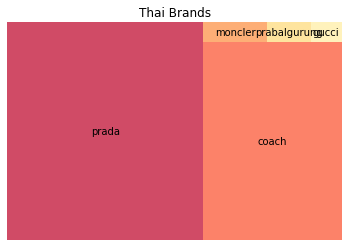

In [135]:
squarify.plot(sizes=clean_thai.iloc[:5, :]['count'], label=clean_thai.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Thai Brands')
plt.show()

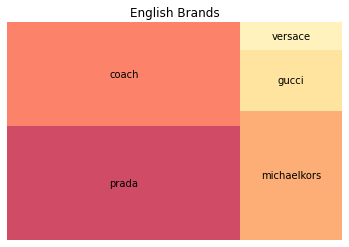

In [134]:
squarify.plot(sizes=clean_english.iloc[:5, :]['count'], label=clean_english.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('English Brands')
plt.show()

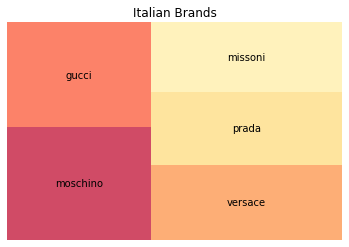

In [133]:
squarify.plot(sizes=clean_italian.iloc[:5, :]['count'], label=clean_italian.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Italian Brands')
plt.show()

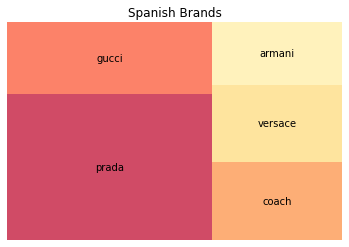

In [132]:
squarify.plot(sizes=clean_spanish.iloc[:5, :]['count'], label=clean_spanish.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Spanish Brands')
plt.show()

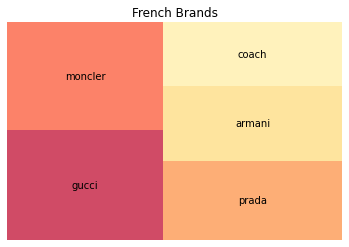

In [131]:
squarify.plot(sizes=clean_french.iloc[:5, :]['count'], label=clean_french.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('French Brands')
plt.show()

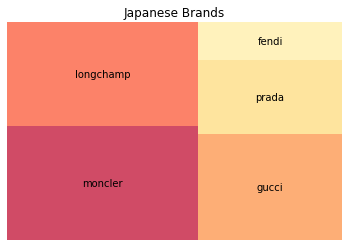

In [130]:
squarify.plot(sizes=clean_japanese.iloc[:5, :]['count'], label=clean_japanese.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Japanese Brands')
plt.show()

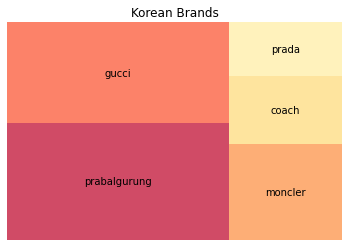

In [129]:
squarify.plot(sizes=clean_korean.iloc[:5, :]['count'], label=clean_korean.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Korean Brands')
plt.show()

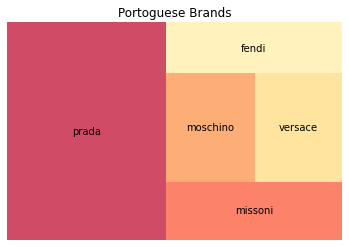

In [128]:
squarify.plot(sizes=clean_port.iloc[:5, :]['count'], label=clean_port.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Portoguese Brands')
plt.show()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

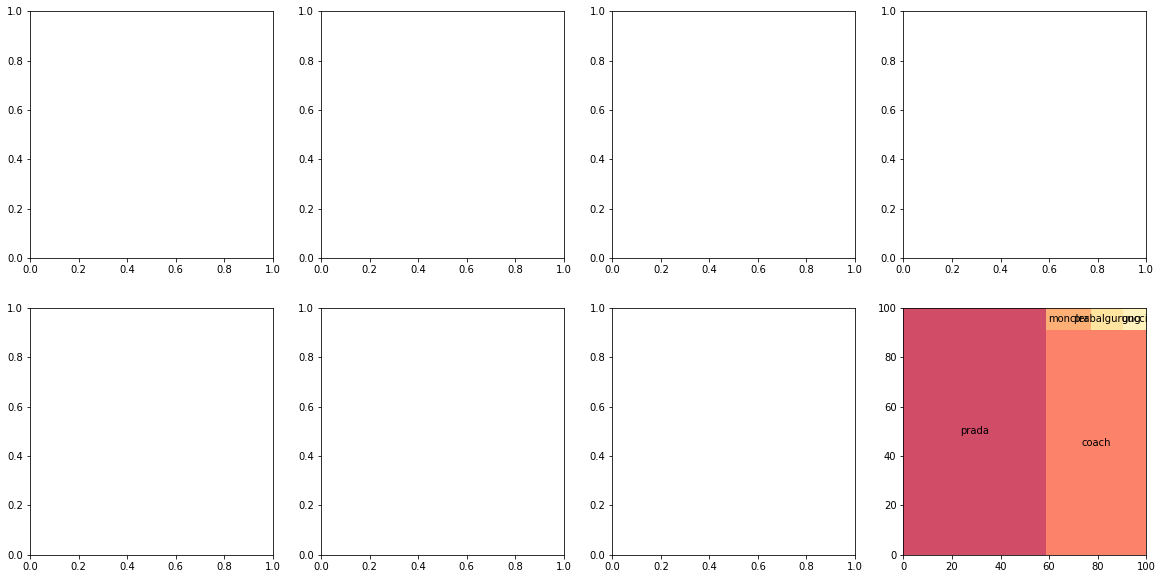

In [148]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs[0,0].plot(squarify.plot(sizes=clean_thai.iloc[:5, :]['count'], label=clean_thai.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"]))
axs[0, 0].set_title('Thai')

squarify.plot(sizes=clean_port.iloc[:5, :]['count'], label=clean_port.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[0, 1].set_title('Portuguese')

squarify.plot(sizes=clean_japanese.iloc[:5, :]['count'], label=clean_japanese.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[0, 2].set_title('Japanese')

squarify.plot(sizes=clean_korean.iloc[:5, :]['count'], label=clean_korean.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[0, 3].set_title('Korean')

squarify.plot(sizes=clean_italian.iloc[:5, :]['count'], label=clean_italian.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[1, 0].set_title('Italian')

squarify.plot(sizes=clean_spanish.iloc[:5, :]['count'], label=clean_spanish.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[1, 1].set_title('Spanish')

squarify.plot(sizes=clean_french.iloc[:5, :]['count'], label=clean_french.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[1, 2].set_title('Portuguese')

squarify.plot(sizes=clean_english.iloc[:5, :]['count'], label=clean_english.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
axs[1, 3].set_title('English')